In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

import tensorflow.keras.layers as layers

In [5]:

builders = tfds.list_builders()
print("Available datasets:")
for builder in builders:
    print(builder)


Available datasets:
abstract_reasoning
accentdb
aeslc
aflw2k3d
ag_news_subset
ai2_arc
ai2_arc_with_ir
amazon_us_reviews
anli
answer_equivalence
arc
asqa
asset
assin2
asu_table_top_converted_externally_to_rlds
austin_buds_dataset_converted_externally_to_rlds
austin_sailor_dataset_converted_externally_to_rlds
austin_sirius_dataset_converted_externally_to_rlds
bair_robot_pushing_small
bc_z
bccd
beans
bee_dataset
beir
berkeley_autolab_ur5
berkeley_cable_routing
berkeley_fanuc_manipulation
berkeley_gnm_cory_hall
berkeley_gnm_recon
berkeley_gnm_sac_son
berkeley_mvp_converted_externally_to_rlds
berkeley_rpt_converted_externally_to_rlds
big_patent
bigearthnet
billsum
binarized_mnist
binary_alpha_digits
ble_wind_field
blimp
booksum
bool_q
bot_adversarial_dialogue
bridge
bucc
c4
c4_wsrs
caltech101
caltech_birds2010
caltech_birds2011
cardiotox
cars196
cassava
cats_vs_dogs
celeb_a
celeb_a_hq
cfq
cherry_blossoms
chexpert
cifar10
cifar100
cifar100_n
cifar10_1
cifar10_corrupted
cifar10_h
cifar10_n
ci

In [6]:
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [7]:
# Load the CIFAR-10 dataset
dataset = tfds.load('cifar10', split='train', shuffle_files=True)
t_dataset = tfds.load('cifar10', split='test', shuffle_files=True)

In [8]:
# Initialize lists to store images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

# Iterate through the train dataset
for data in dataset:
    image, label = data['image'], data['label']
    train_images.append(image.numpy())
    train_labels.append(label.numpy())

# Iterate through the test dataset
for data in t_dataset:
    image, label = data['image'], data['label']
    test_images.append(image.numpy())
    test_labels.append(label.numpy())
    
# Convert lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

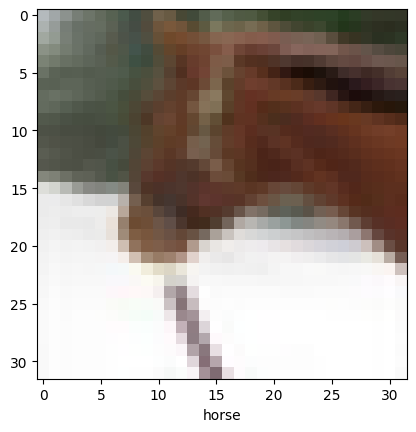

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# # Get an iterator for the dataset
# iterator = iter(train_images)

# # Choose an image index
# IMG_INDEX = 7  # Change this to the index of the image you want to display

# # Iterate to the selected image index
# for i in range(IMG_INDEX + 1):
#     image, label = next(iterator)

# Display the image and label
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[0]])
plt.show()

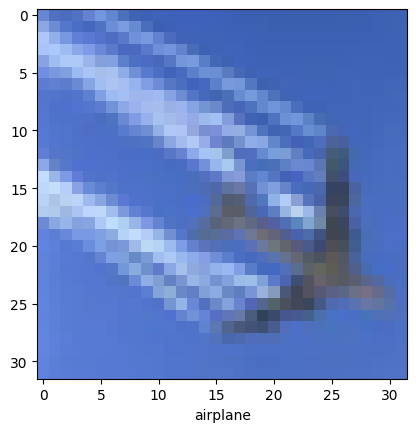

In [12]:
# # Get an iterator for the dataset
# iterator = iter(test_dataset)

# Choose an image index
IMG_INDEX = 7  # Change this to the index of the image you want to display

# # Iterate to the selected image index
# for i in range(IMG_INDEX + 1):
#     image, label = next(iterator)

# Display the image and label
plt.imshow(test_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[IMG_INDEX]])
plt.show()

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
test_images.shape

(10000, 32, 32, 3)

In [51]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9555 - accuracy: 0.6676 - val_loss: 1.0488 - val_accuracy: 0.6350
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8919 - accuracy: 0.6901 - val_loss: 1.0175 - val_accuracy: 0.6554
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8409 - accuracy: 0.7086 - val_loss: 1.0287 - val_accuracy: 0.6520
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7842 - accuracy: 0.7293 - val_loss: 1.0644 - val_accuracy: 0.6536
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7490 - accuracy: 0.7394 - val_loss: 0.9940 - val_accuracy: 0.6734
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7170 - accuracy: 0.7522 - val_loss: 1.0594 - val_accuracy: 0.6578
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6848 - accuracy: 0.7605 - val_loss: 1.0522 -

In [52]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 1.1660 - accuracy: 0.6602 - 3s/epoch - 10ms/step
0.6601999998092651


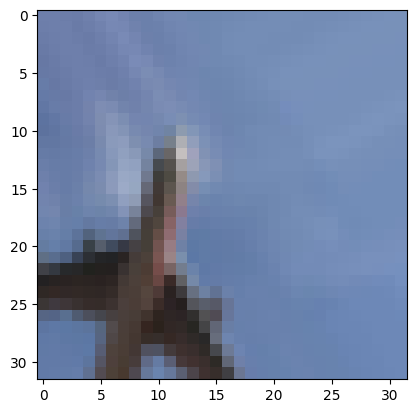

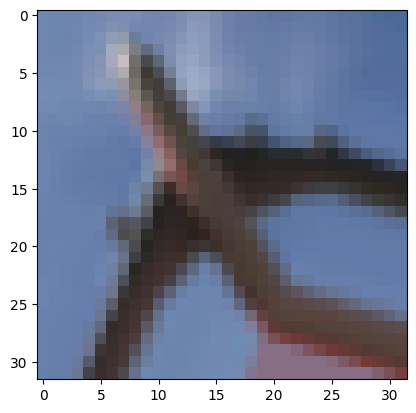

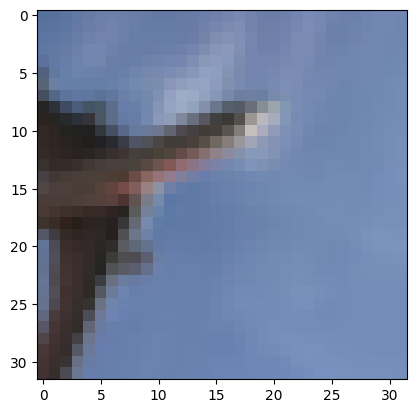

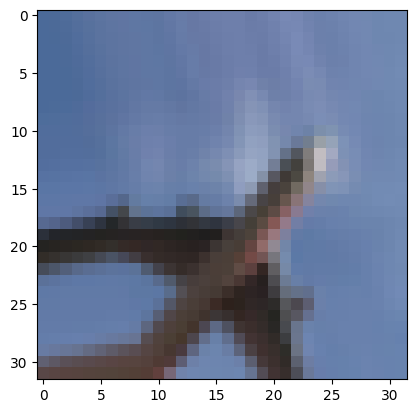

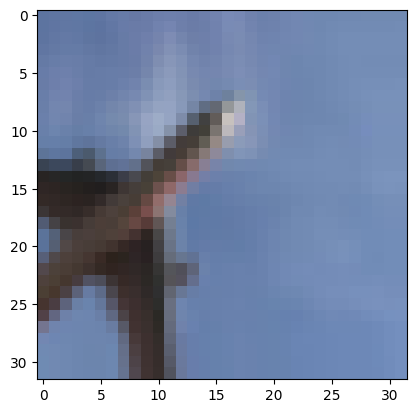

In [18]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy array
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    augmented_img = batch[0]
    augmented_img = augmented_img / 255.0  # Normalize pixel values to [0, 1]

    plt.figure(i)
    plt.imshow(augmented_img)
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()


In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Set the number of epochs for the retraining
epochs = 10

# # Train the model on the original training data
# history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

In [20]:

# Generate additional augmented images using the ImageDataGenerator and train the model on them
augmented_images = []
augmented_labels = []

# Number of augmented images to generate per original image
augmentation_factor = 5

for img, label in zip(train_images, train_labels):
    img = image.img_to_array(img)
    img = img.reshape((1,) + img.shape)

    # Generate augmented images
    for batch in datagen.flow(img, batch_size=1):
        augmented_img = batch[0]
        augmented_img = augmented_img / 255.0  # Normalize pixel values to [0, 1]

        augmented_images.append(augmented_img)
        augmented_labels.append(label)

        # Break the loop if the desired number of augmented images is reached
        if len(augmented_images) % augmentation_factor == 0:
            break


In [21]:

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [23]:
# Train the model on the original and augmented data
history_augmented = model.fit(
    np.concatenate((train_images, augmented_images)),
    np.concatenate((train_labels, augmented_labels)),
    epochs=epochs,
    validation_data=(test_images, test_labels)
)


Epoch 1/10
9375/9375 [==============================] - 303s 32ms/step - loss: 1.6794 - accuracy: 0.3865 - val_loss: 1.6334 - val_accuracy: 0.3986
Epoch 2/10
9375/9375 [==============================] - 298s 32ms/step - loss: 1.3518 - accuracy: 0.5142 - val_loss: 1.4842 - val_accuracy: 0.4432
Epoch 3/10
9375/9375 [==============================] - 283s 30ms/step - loss: 1.2338 - accuracy: 0.5596 - val_loss: 1.4352 - val_accuracy: 0.4681
Epoch 4/10
9375/9375 [==============================] - 285s 30ms/step - loss: 1.1690 - accuracy: 0.5836 - val_loss: 1.4643 - val_accuracy: 0.4474
Epoch 5/10
9375/9375 [==============================] - 288s 31ms/step - loss: 1.1250 - accuracy: 0.5995 - val_loss: 1.4893 - val_accuracy: 0.4887
Epoch 6/10
9375/9375 [==============================] - 286s 31ms/step - loss: 1.0863 - accuracy: 0.6144 - val_loss: 1.4007 - val_accuracy: 0.4793
Epoch 7/10
9375/9375 [==============================] - 288s 31ms/step - loss: 1.0628 - accuracy: 0.6239 - val_loss: 1

In [24]:
# Train the model on the original and augmented data
history= model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1563/1563 [==============================] - 47s 29ms/step - loss: 1.3003 - accuracy: 0.5250 - val_loss: 1.3126 - val_accuracy: 0.5175
Epoch 2/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.2253 - accuracy: 0.5554 - val_loss: 1.2828 - val_accuracy: 0.5449
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1938 - accuracy: 0.5648 - val_loss: 1.2662 - val_accuracy: 0.5521
Epoch 4/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.2881 - accuracy: 0.5441 - val_loss: 1.2826 - val_accuracy: 0.5458
Epoch 5/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.1836 - accuracy: 0.5700 - val_loss: 1.2406 - val_accuracy: 0.5537
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1556 - accuracy: 0.5778 - val_loss: 1.2822 - val_accuracy: 0.5315
Epoch 7/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.1526 - accuracy: 0.5830 - val_loss: 1.3032 -